# Cancer classifier using a convolutional neuronal network

In [1]:
#google drive import:
from google.colab import drive
import zipfile
import os

# 1. Google Drive mounten
drive.mount('/content/drive')

# 2. Pfade setzen
zip_path = '/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000.zip'  # ZIP in deiner Ablage
extract_path = '/content/Kather_texture_2016_image_tiles_5000'  # Ziel zum Entpacken

# 3. Entpacken
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 4. Kontrolle: was ist drin?
print("Dateien entpackt nach:", extract_path)
print("Inhalt:", os.listdir(extract_path))

Mounted at /content/drive
Dateien entpackt nach: /content/Kather_texture_2016_image_tiles_5000
Inhalt: ['Kather_texture_2016_image_tiles_5000']


In [3]:
#import libraries
#!pip install matplotlib
#!pip install keras
#!pip install tensorflow
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 628.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00


### Define parameters

In [7]:
#The given pictures are of 150 px * 150px | 8 classes are given
img_size = (150, 150)
batch_size = 32
image_path = "Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000"

### Generate images rescaled

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    image_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    image_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 4000 images belonging to 8 classes.
Found 1000 images belonging to 8 classes.


### Define the CNN model


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3),padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(train_gen.num_classes, activation="softmax")
])

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Train the model

In [10]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.4604 - loss: 1.7852 - val_accuracy: 0.2510 - val_loss: 6.5904
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.6519 - loss: 0.9201 - val_accuracy: 0.2220 - val_loss: 5.6943
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.7061 - loss: 0.7331 - val_accuracy: 0.3380 - val_loss: 2.6611
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.7367 - loss: 0.6805 - val_accuracy: 0.6760 - val_loss: 0.8435
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.7655 - loss: 0.6172 - val_accuracy: 0.5320 - val_loss: 1.2488
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.7600 - loss: 0.6242 - val_accuracy: 0.4980 - val_loss: 1.4630
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.7918 - loss: 0.5297 - val_accuracy: 0.5830 - val_loss: 1.3307
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.7925 - loss: 0.5194 - val_accu

### Evaluation

In [11]:
test_loss, test_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {test_acc:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.7302 - loss: 0.5552
Validation Accuracy: 0.74


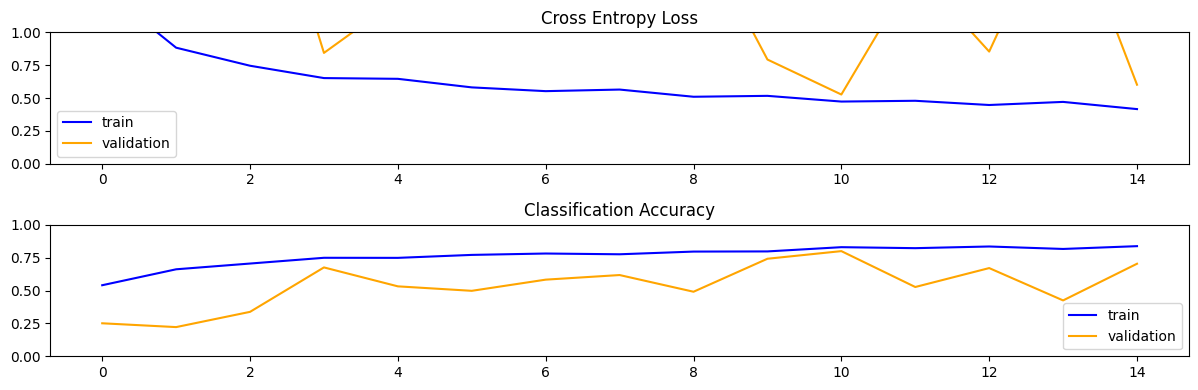

In [12]:
pyplot.figure(figsize=(12, 4))
# plot loss
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='validation')
pyplot.ylim(0.0,1.0)
pyplot.legend()

# plot accuracy
pyplot.subplot(2,1,2)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')
pyplot.legend()
pyplot.ylim(0.0,1.0)

pyplot.tight_layout()
pyplot.show()